## Лабораторая работа 9

**Задача:** Провести полный факторный анализ

### Описание датасета "Predict Online Gaming Behavior Dataset"
Этот набор данных фиксирует комплексные метрики и демографию, связанные с поведением игроков в онлайн-игровых средах. Он включает такие переменные, как демография игроков, детали, характерные для игры, метрики вовлеченности и целевую переменную, отражающую удержание игроков.


| **Переменная** | **Описание** |
|----------------|--------------|
| **PlayerID**   | Уникальный идентификатор для каждого игрока. |
| **Age**        | Возраст игрока. |
| **Gender**     | Пол игрока. |
| **Location**   | Географическое местоположение игрока. |
| **GameGenre**  | Жанр игры, в которой участвует игрок. |
| **PlayTimeHours** | Среднее количество часов, проведенных за игрой за одну сессию. |
| **InGamePurchases** | Признак того, делает ли игрок внутриигровые покупки (0 — Нет, 1 — Да). |
| **GameDifficulty** | Уровень сложности игры. |
| **SessionsPerWeek** | Количество игровых сессий в неделю. |
| **AvgSessionDurationMinutes** | Средняя продолжительность каждой игровой сессии в минутах. |
| **PlayerLevel** | Текущий уровень игрока в игре. |
| **AchievementsUnlocked** | Количество достижений, разблокированных игроком. |
| **EngagementLevel** | Категоризированный уровень вовлеченности, отражающий удержание игроков ('Высокий', 'Средний', 'Низкий'). |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.rotator import Rotator


### Преобразование данных

In [7]:
df = pd.read_csv('../online_gaming_behavior_dataset.csv')

engagement_map = {'Low': 0, 'Medium': 1, 'High': 2}
difficult_map = {'Easy': 0, 'Medium': 1, 'Hard': 2}
df['EngagementLevel'] = df['EngagementLevel'].map(engagement_map)
df['GameDifficulty'] = df['GameDifficulty'].map(difficult_map)

columns_to_use = ["Age", "PlayTimeHours", "InGamePurchases", "SessionsPerWeek", "AvgSessionDurationMinutes", "PlayerLevel", "AchievementsUnlocked", "GameDifficulty", "EngagementLevel"]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[columns_to_use])

### Определение оптимального числа факторов 

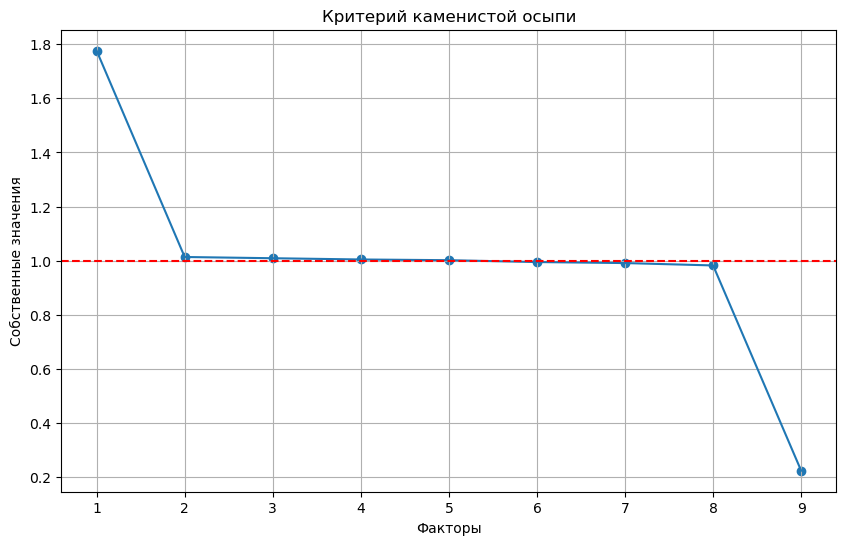

Собственные значения:
Фактор 1: 1.776
Фактор 2: 1.014
Фактор 3: 1.009
Фактор 4: 1.005
Фактор 5: 1.002
Фактор 6: 0.995
Фактор 7: 0.992
Фактор 8: 0.983
Фактор 9: 0.224


In [8]:
# Создание объекта факторного анализа
fa = FactorAnalyzer(rotation=None, impute="drop", n_factors=len(columns_to_use))

# Подгонка модели
fa.fit(data_scaled)

# Вычисление собственных значений
ev, v = fa.get_eigenvalues()

# Визуализация критерия каменистой осыпи
plt.figure(figsize=(10, 6))
plt.scatter(range(1, data_scaled.shape[1]+1), ev)
plt.plot(range(1, data_scaled.shape[1]+1), ev)
plt.title('Критерий каменистой осыпи')
plt.xlabel('Факторы')
plt.ylabel('Собственные значения')
plt.grid()
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

# Вывод собственных значений
print("Собственные значения:")
for i, val in enumerate(ev, 1):
    print(f"Фактор {i}: {val:.3f}")

###  Факторный анализ


Факторные нагрузки:


,Factor1,Factor2
Age,0.009144,-0.003669
PlayTimeHours,-0.002903,-0.001623
InGamePurchases,0.006707,0.002534
SessionsPerWeek,0.978164,0.138012
AvgSessionDurationMinutes,-0.083403,0.593396
PlayerLevel,0.008556,0.043114
AchievementsUnlocked,0.009779,0.041646
GameDifficulty,0.004364,0.003772
EngagementLevel,0.495070,0.868281


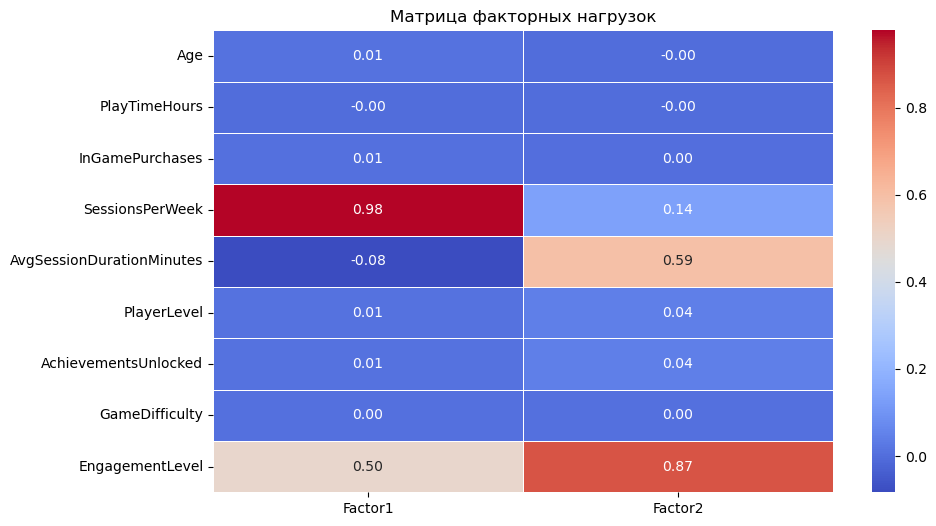

In [14]:
n_factors = 2

fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa.fit(data_scaled)

loadings = pd.DataFrame(fa.loadings_, 
                        index=columns_to_use,
                        columns=[f"Factor{i+1}" for i in range(n_factors)])

print("Факторные нагрузки:")
display(loadings)

plt.figure(figsize=(10, 6))
sns.heatmap(loadings, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Матрица факторных нагрузок')
plt.show()

Общности переменных:


,Общности
EngagementLevel,0.999006
SessionsPerWeek,0.975852
AvgSessionDurationMinutes,0.359075
PlayerLevel,0.001932
AchievementsUnlocked,0.001830
Age,0.000097
InGamePurchases,0.000051
GameDifficulty,0.000033
PlayTimeHours,0.000011



Объясненная дисперсия:


,Factor1,Factor2
SS Loadings,1.209180,1.128708
Proportion Var,0.134353,0.125412
Cumulative Var,0.134353,0.259765


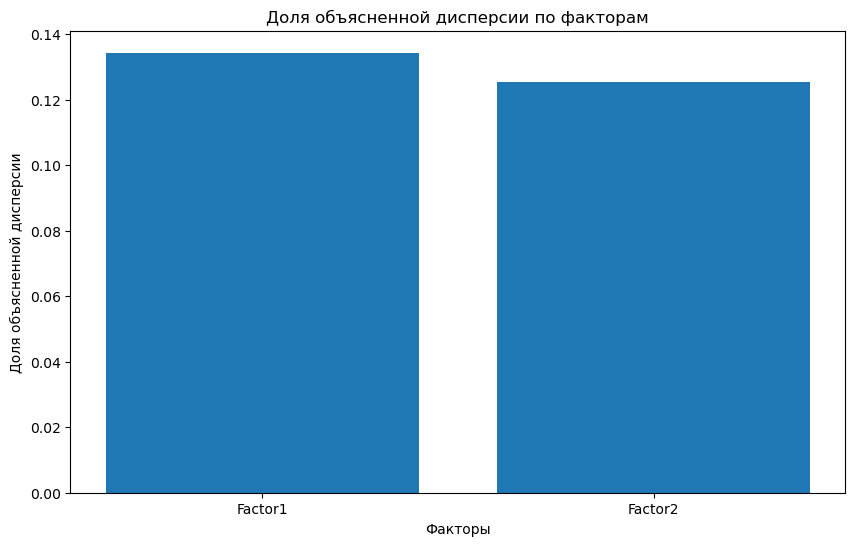

In [ ]:
communalities = pd.DataFrame(fa.get_communalities(),
                           index=columns_to_use,
                           columns=['Общности'])

print("Общности переменных:")
display(communalities.sort_values(by='Общности', ascending=False))

variance = pd.DataFrame(fa.get_factor_variance(),
                       index=['SS Loadings', 'Proportion Var', 'Cumulative Var'],
                       columns=[f"Factor{i+1}" for i in range(n_factors)])

print("\nОбъясненная дисперсия:")
display(variance)

plt.figure(figsize=(10, 6))
plt.bar(variance.columns, variance.loc['Proportion Var'])
plt.title('Доля объясненной дисперсии по факторам')
plt.xlabel('Факторы')
plt.ylabel('Доля объясненной дисперсии')
plt.show()

### Вывод

1. **Factor1 (можно интерпертировать его как "Частота игровой активности"):**
    1. **Доминирующая переменная:** SessionsPerWeek (нагрузка 0.98)
    2. **Умеренная нагрузка:** EngagementLevel (нагрузка 0.50)
    3. **Смысл:** Фактор отражает количество сессий в неделю и частично связан с вовлеченностью. Это может указывать на "ритм" игрового поведения — как часто игрок возвращается в игру.

2. **Factor2 (можно интерпертировать его как, "Глубина вовлеченности"):**
    1. **Доминирующие переменные:**
        1. EngagementLevel (нагрузка 0.87)
        2. AvgSessionDurationMinutes (нагрузка 0.59)
    2. **Смысл:** Фактор объединяет продолжительность сессий и уровень вовлеченности, что характеризует "качество" игрового опыта — насколько глубоко игрок погружен в игру.

**Незначимые переменные:**

**Не вошли в факторы:** Age, InGamePurchases, PlayerLevel, AchievementsUnlocked, GameDifficulty (нагрузки близки к 0).

**Вывод:** Эти переменные слабо коррелируют с выделенными факторами. Возможно, они: